In [2]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 5.2 MB/s 
     |████████████████████████████████| 448 kB 48.2 MB/s 
     |████████████████████████████████| 86 kB 5.5 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [4]:
import pandas as pd
from konlpy.tag import Twitter 

import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdriv')

Mounted at /content/gdriv


In [5]:
import os
print(os.listdir('/content/gdriv/My Drive/Colab Notebooks/data'))

['datasets_19_420_Iris.csv', 'archive.zip', 'car.csv', 'test_car.csv', 'stock.csv', 'test_stock.csv', 'cars_part_quality.csv', 'term_data.csv', 'titanic.csv', 'titanic_term_without_y.csv', 'fine_dust_without_y.csv', 'fine_dust.csv', 'gear', 'BCI.csv', 'bdi.csv', 'News.csv', 'wine.jpg']


In [6]:
news = pd.read_csv("/content/gdriv/My Drive/Colab Notebooks/data/News.csv", encoding='utf-8')
print(news.columns)

Index(['뉴스식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드', '특성추출',
       '본문', 'URL', '분석제외 여부'],
      dtype='object')


In [7]:
news['본문'][0:10]

0    울산·부산지역 중소기업의 이번달 업황전망이 부정적으로 나타났다... .. .. .....
1    2019년 기해(己亥)년은 천간은 음토(陰土)요, 지지는 해수(亥水)다... 천간 ...
2    지난해 북미와 일본 펀드는 높이 날았지만 그만큼 골도 깊었다... 미국과 일본의 경...
3    세계 뒤흔드는 트럼프노믹스 .. ..최소 1년은 상승장 전망 우세..美 실업률 49...
4    [머니투데이 뉴욕(미국)=송정렬 특파원] .. ..유가가 올해 마지막 거래일에 소폭...
5    [머니투데이 변휘 기자] ◆산업은행  <승진> ▷수석부행장 △성주영 ▷부행장(부문장...
6    [머니투데이 뉴욕(미국)=송정렬 특파원] .. ..달러가 약세를 보였다... 하지만...
7    지난해 천당과 지옥을 오갔던 국내 주식시장이 기해년 새해를 맞아 힘찬 도약을 준비하...
8    글로벌 경기 둔화 신호가 글로벌 곳곳에서 나오는 가운데 2019년 기업들의 실적도 ...
9    지난해 유가증권시장에서 3만7180원(227.82%) 올랐다. 12월28일 종가는 ...
Name: 본문, dtype: object

In [8]:
text = '자연어처리는 컴퓨터가 인간의 언어를 인식하는 분야입니다'

# 꼬꼬마 형태소분석기 사용
from konlpy.tag import Kkma
kkma = Kkma()

print("명사 : ", kkma.nouns(text))    # 명사
print("형태소 : ", kkma.morphs(text))   # 형태소
print("형태소와 품사 : ", kkma.pos(text))      # 형태소와 품사

명사 :  ['자연어', '자연어처리', '처리', '컴퓨터', '인간', '언어', '인식', '분야']
형태소 :  ['자연어', '처리', '는', '컴퓨터', '가', '인간', '의', '언어', '를', '인식', '하', '는', '분야', '이', 'ㅂ니다']
형태소와 품사 :  [('자연어', 'NNG'), ('처리', 'NNG'), ('는', 'JX'), ('컴퓨터', 'NNG'), ('가', 'JKS'), ('인간', 'NNG'), ('의', 'JKG'), ('언어', 'NNG'), ('를', 'JKO'), ('인식', 'NNG'), ('하', 'XSV'), ('는', 'ETD'), ('분야', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN')]


In [9]:
import re
# 데이터 전처리 및 토큰화 
hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
token_list = []
for idx, text in enumerate(news['본문']):
  if idx < 1500:
    print('[Progress: {}/{}]'.format((idx+1),1500))
    result = hangul.sub('', text)
    for token in kkma.pos(result):
      if token[1] == 'NNG':
        if len(token[0])>1:
          token_list.append(token[0])

[Progress: 1/1500]
[Progress: 2/1500]
[Progress: 3/1500]
[Progress: 4/1500]
[Progress: 5/1500]
[Progress: 6/1500]
[Progress: 7/1500]
[Progress: 8/1500]
[Progress: 9/1500]
[Progress: 10/1500]
[Progress: 11/1500]
[Progress: 12/1500]
[Progress: 13/1500]
[Progress: 14/1500]
[Progress: 15/1500]
[Progress: 16/1500]
[Progress: 17/1500]
[Progress: 18/1500]
[Progress: 19/1500]
[Progress: 20/1500]
[Progress: 21/1500]
[Progress: 22/1500]
[Progress: 23/1500]
[Progress: 24/1500]
[Progress: 25/1500]
[Progress: 26/1500]
[Progress: 27/1500]
[Progress: 28/1500]
[Progress: 29/1500]
[Progress: 30/1500]
[Progress: 31/1500]
[Progress: 32/1500]
[Progress: 33/1500]
[Progress: 34/1500]
[Progress: 35/1500]
[Progress: 36/1500]
[Progress: 37/1500]
[Progress: 38/1500]
[Progress: 39/1500]
[Progress: 40/1500]
[Progress: 41/1500]
[Progress: 42/1500]
[Progress: 43/1500]
[Progress: 44/1500]
[Progress: 45/1500]
[Progress: 46/1500]
[Progress: 47/1500]
[Progress: 48/1500]
[Progress: 49/1500]
[Progress: 50/1500]
[Progress

In [10]:
# 결과확인
token_list[0:20]

['울산',
 '부산',
 '지역',
 '중소기업',
 '이번',
 '전망',
 '부정적',
 '중소기업',
 '중앙회',
 '부산',
 '울산',
 '본부',
 '지역',
 '중소기업',
 '개사',
 '대상',
 '중소기업',
 '경기',
 '전망',
 '조사']

In [11]:
dt_token_list = pd.DataFrame(token_list)[0].value_counts()
dt_token_list

체결     1448
매수     1009
거래      922
매도      823
상승      510
       ... 
교부        1
전담        1
세기        1
극대화       1
미간        1
Name: 0, Length: 3148, dtype: int64

In [12]:
# dict 형태로 변환하기
word = dict()
for i in range(len(dt_token_list)):
  word.update({list(dt_token_list.index)[i]:dt_token_list.iloc[0]})
print(word)

{'체결': 1448, '매수': 1448, '거래': 1448, '매도': 1448, '상승': 1448, '거래량': 1448, '투자': 1448, '강도': 1448, '대비': 1448, '오전': 1448, '시장': 1448, '오후': 1448, '주가': 1448, '증권': 1448, '현재': 1448, '금융': 1448, '거래일': 1448, '강세': 1448, '기자': 1448, '기록': 1448, '하락': 1448, '잔량': 1448, '지난해': 1448, '주식': 1448, '유지': 1448, '코스': 1448, '지수': 1448, '전일': 1448, '올해': 1448, '회전율': 1448, '대금': 1448, '증시': 1448, '개장': 1448, '지분': 1448, '변동': 1448, '코스닥': 1448, '거래소': 1448, '전망': 1448, '증가': 1448, '반전': 1448, '종목': 1448, '기업': 1448, '흐름': 1448, '경기': 1448, '경제': 1448, '외국인': 1448, '기관': 1448, '국내': 1448, '포인트': 1448, '우위': 1448, '투자자': 1448, '새해': 1448, '본부장': 1448, '시각': 1448, '최근': 1448, '분기': 1448, '보고': 1448, '공시': 1448, '이번': 1448, '실적': 1448, '관계자': 1448, '급증': 1448, '이후': 1448, '발표': 1448, '분전': 1448, '개인': 1448, '이상': 1448, '업종': 1448, '직전': 1448, '투데이': 1448, '주주': 1448, '머니': 1448, '기준': 1448, '마감': 1448, '상장': 1448, '주요': 1448, '자산': 1448, '한국': 1448, '최대': 1448, '서울': 1448, '매매': 1448, '이날': 1448, '한때

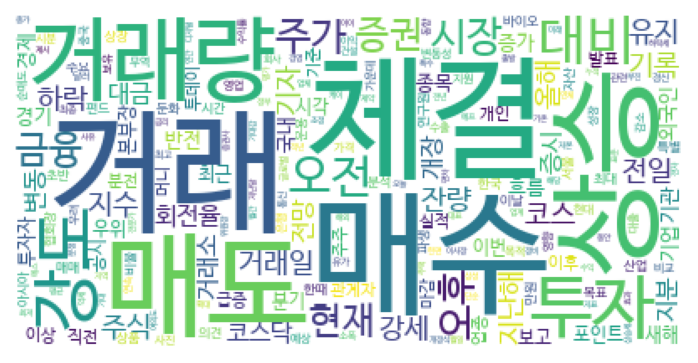

In [13]:
# word cloud 만들기
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',background_color='white').generate_from_frequencies(word) 

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

In [14]:
def google_authenticate():
  # Authenticate first so the Google Drive library can detect your credentials.
  from google.colab import auth
  auth.authenticate_user()

  from googleapiclient.discovery import build
  drive_service = build('drive', 'v3')
  return drive_service

In [15]:
drive_service = google_authenticate()

In [16]:
def read_file(file_id):

  
  file_id = file_id

  import io
  from googleapiclient.http import MediaIoBaseDownload

  request = drive_service.files().get_media(fileId=file_id)
  downloaded = io.BytesIO()
  downloader = MediaIoBaseDownload(downloaded, request)
  done = False
  while done is False:
    _, done = downloader.next_chunk()

  downloaded.seek(0)
  return downloaded

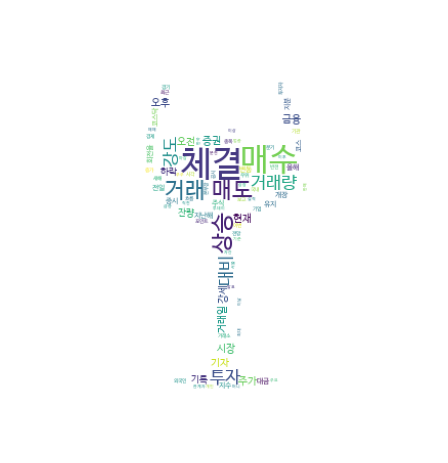

In [17]:
from PIL import Image

# create mask
image = "/content/gdriv/My Drive/Colab Notebooks/data/wine.jpg"
image_mask = np.array(Image.open(image))

wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',mask = image_mask,background_color='white').generate_from_frequencies(word) 

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

In [18]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 5.3 MB/s 
     |████████████████████████████████| 895 kB 35.3 MB/s 
     |████████████████████████████████| 596 kB 46.5 MB/s 
     |████████████████████████████████| 61 kB 500 kB/s 
     |████████████████████████████████| 3.3 MB 35.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [19]:
import torch

from transformers import BertTokenizer
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import random
import time
import datetime

In [20]:
# 데이터 다운로드
!git clone https://github.com/e9t/nsmc.git 

Cloning into 'nsmc'...
remote: Enumerating objects: 14763, done.
remote: Total 14763 (delta 0), reused 0 (delta 0), pack-reused 14763
Receiving objects: 100% (14763/14763), 56.19 MiB | 18.47 MiB/s, done.
Resolving deltas: 100% (1749/1749), done.
Checking out files: 100% (14737/14737), done.


In [21]:
train = pd.read_csv("nsmc/ratings_train.txt", sep='\t')
test = pd.read_csv("nsmc/ratings_test.txt", sep='\t')

print(train.shape)
print(test.shape)

(150000, 3)
(50000, 3)


In [22]:
train.head()
#0은 긍정 1은 부정

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [23]:
# 리뷰 문장 추출
sentences = train['document']
sentences[:10]

0                                  아 더빙.. 진짜 짜증나네요 목소리
1                    흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                        교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
5        막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.
6                                원작의 긴장감을 제대로 살려내지못했다.
7    별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...
8                               액션이 없는데도 재미 있는 몇안되는 영화
9        왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?
Name: document, dtype: object

BERT 모델 형식

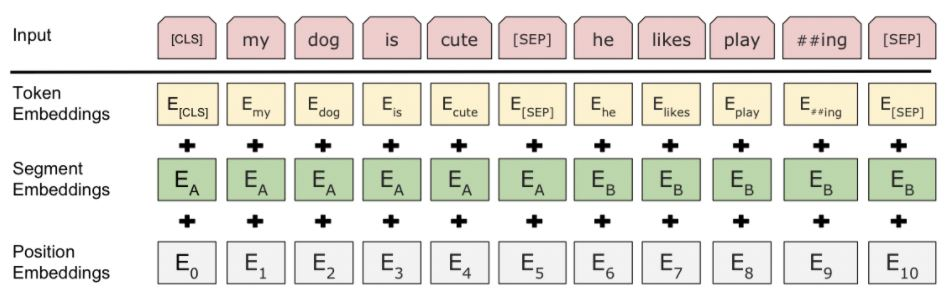

* BERT의 입력은 위의 그림과 같은 형식
* Classification을 뜻하는 [CLS] 심볼이 제일 앞에 삽입
* Fine tunning 시 출력에서 이 위치의 값을 사용하여 분류
* [SEP]은 Seperation을 지칭하며, 두 문장을 구분하는 역할 수행


In [24]:
# BERT의 입력 형식에 맞게 변환
sentences = ["[CLS] " + str(sentence) + " [SEP]" for sentence in sentences]
sentences[:10]

['[CLS] 아 더빙.. 진짜 짜증나네요 목소리 [SEP]',
 '[CLS] 흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나 [SEP]',
 '[CLS] 너무재밓었다그래서보는것을추천한다 [SEP]',
 '[CLS] 교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정 [SEP]',
 '[CLS] 사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다 [SEP]',
 '[CLS] 막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움. [SEP]',
 '[CLS] 원작의 긴장감을 제대로 살려내지못했다. [SEP]',
 '[CLS] 별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네 [SEP]',
 '[CLS] 액션이 없는데도 재미 있는 몇안되는 영화 [SEP]',
 '[CLS] 왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나? [SEP]']

In [25]:
# 라벨 추출
labels = train['label'].values
labels

array([0, 1, 0, ..., 0, 1, 0])

In [26]:
# BERT의 토크나이저로 문장을 토큰으로 분리
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

print (sentences[0])
print (tokenized_texts[0])

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.87M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

[CLS] 아 더빙.. 진짜 짜증나네요 목소리 [SEP]
['[CLS]', '아', '더', '##빙', '.', '.', '진', '##짜', '짜', '##증', '##나', '##네', '##요', '목', '##소', '##리', '[SEP]']


* BERT는 형태소분석으로 토큰을 분리하지 않음 
* WordPiece라는 통계적인 방식을 사용: 한 단어내에서 자주 나오는 글자들을 붙여서 하나의 토큰으로 만들며, 언어에 상관없이 토큰을 생성할 수 있다는 장점있고  신조어 같이 사전에 없는 단어를 처리하기도 용이함

* 위의 결과에서 ## 기호는 앞 토큰과 이어진다는 표시이며, 토크나이저는 여러 언어의 데이터를 기반으로 만든 'bert-base-multilingual-cased'를 사용

* bert-base-multilingual-cased 는 한글어도 지원하고 있음

In [27]:
# 입력 토큰의 최대 시퀀스 길이
MAX_LEN = 128

# 토큰을 숫자 인덱스로 변환
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

# 문장을 MAX_LEN 길이에 맞게 자르고, 모자란 부분을 패딩 0으로 채움
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

input_ids[0]

array([   101,   9519,   9074, 119005,    119,    119,   9708, 119235,
         9715, 119230,  16439,  77884,  48549,   9284,  22333,  12692,
          102,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

* 보통 딥러닝 모델에는 토큰 자체를 입력으로 넣을수 없기 때문에, 숫자로 변환하는 것이 필요하며 이과정을 Embedding 이라고 함

* BERT의 토크나이저는 {단어토큰:인덱스}로 구성된 단어사전을 가지고 있으며, 이 단어사전을 참조하여 토큰을 인덱스로 변형시켜줌

In [28]:
# 어텐션 마스크 초기화
attention_masks = []

# 어텐션 마스크를 패딩이 아니면 1, 패딩이면 0으로 설정
# 패딩 부분은 BERT 모델에서 어텐션을 수행하지 않아 속도 향상
for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)

print(attention_masks[0])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [29]:
# 훈련셋과 검증셋으로 분리
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids,
                                                                                    labels, 
                                                                                    random_state=2018, 
                                                                                    test_size=0.1)

# 어텐션 마스크를 훈련셋과 검증셋으로 분리
train_masks, validation_masks, _, _ = train_test_split(attention_masks, 
                                                       input_ids,
                                                       random_state=2018, 
                                                       test_size=0.1)

# 데이터를 파이토치의 텐서로 변환
train_inputs = torch.tensor(train_inputs)
train_labels = torch.tensor(train_labels)
train_masks = torch.tensor(train_masks)
validation_inputs = torch.tensor(validation_inputs)
validation_labels = torch.tensor(validation_labels)
validation_masks = torch.tensor(validation_masks)				

print(train_inputs[0])
print(train_labels[0])
print(train_masks[0])
print(validation_inputs[0])
print(validation_labels[0])
print(validation_masks[0])

tensor([   101,   9711,  11489,   9364,  41850,   9004,  32537,   9491,  35506,
         17360,  48549,    119,    119,   9477,  26444,  12692,   9665,  21789,
         11287,   9708, 119235,   9659,  22458, 119136,  12965,  48549,    119,
           119,   9532,  22879,   9685,  16985,  14523,  48549,    119,    119,
          9596, 118728,    119,    119,   9178, 106065, 118916,    119,    119,
          8903,  11664,  11513,   9960,  14423,  25503, 118671,  48549,    119,
           119,  21890,   9546,  37819,  22879,   9356,  14867,   9715, 119230,
        118716,  48345,    119,   9663,  23321,  10954,   9638,  35506, 106320,
         10739,  20173,   9359,  19105,  11102,  42428,  17196,  48549,    119,
           119,    100,    117,   9947,  12945,   9532,  25503,   8932,  14423,
         35506, 119050,  11903,  14867,  10003,  14863,  33188,  48345,    119,
           102,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0, 

In [30]:
# 배치 사이즈
batch_size = 32

# 파이토치의 DataLoader로 입력, 마스크, 라벨을 묶어 데이터 설정
# 학습시 배치 사이즈 만큼 데이터를 가져옴
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [31]:
# 분류를 위한 BERT 모델 생성
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=2)
model.cuda()

Downloading:   0%|          | 0.00/681M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [32]:
# 정확도 계산 함수
def flat_accuracy(preds, labels):
    
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [33]:
# 시간 표시 함수
def format_time(elapsed):

    # 반올림
    elapsed_rounded = int(round((elapsed)))
    
    # hh:mm:ss으로 형태 변경
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [34]:
# 옵티마이저 설정
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # 학습률
                  eps = 1e-8 # 0으로 나누는 것을 방지하기 위한 epsilon 값
                )

# 에폭수
epochs = 4

# 총 훈련 스텝 : 배치반복 횟수 * 에폭
total_steps = len(train_dataloader) * epochs

# 처음에 학습률을 조금씩 변화시키는 스케줄러 생성
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

In [ ]:
seed_val = 40
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# 그래디언트 초기화
model.zero_grad()

# 에폭만큼 반복
for epoch_i in range(epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # 시작 시간 설정
    t0 = time.time()

    # 로스 초기화
    total_loss = 0

    # 훈련모드로 변경
    model.train()
        
    # 데이터로더에서 배치만큼 반복하여 가져옴
    for step, batch in enumerate(train_dataloader):
        # 경과 정보 표시
        if step % 500 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # 배치를 GPU에 넣음
        batch = tuple(t.cuda() for t in batch)
        
        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch

        # Forward 수행                
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask, 
                        labels=b_labels)
        
        # 로스 구함
        loss = outputs[0]

        # 총 로스 계산
        total_loss += loss.item()

        # Backward 수행으로 그래디언트 계산
        loss.backward()

        # 그래디언트 클리핑
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # 그래디언트를 통해 가중치 파라미터 업데이트
        optimizer.step()

        # 스케줄러로 학습률 감소
        scheduler.step()

        # 그래디언트 초기화
        model.zero_grad()

    # 평균 로스 계산
    avg_train_loss = total_loss / len(train_dataloader)            

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================

    print("")
    print("Running Validation...")

    #시작 시간 설정
    t0 = time.time()

    # 평가모드로 변경
    model.eval()

    # 변수 초기화
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # 데이터로더에서 배치만큼 반복하여 가져옴
    for batch in validation_dataloader:
        # 배치를 GPU에 넣음
        batch = tuple(t.cuda() for t in batch)
        
        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch
        
        # 그래디언트 계산 안함
        with torch.no_grad():     
            # Forward 수행
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # 로스 구함
        logits = outputs[0]

        # CPU로 데이터 이동
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # 출력 로짓과 라벨을 비교하여 정확도 계산
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1

    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 4 ========
Training...
  Batch   500  of  4,219.    Elapsed: 0:10:56.
  Batch 1,000  of  4,219.    Elapsed: 0:21:51.
  Batch 1,500  of  4,219.    Elapsed: 0:32:47.
  Batch 2,000  of  4,219.    Elapsed: 0:43:43.
  Batch 2,500  of  4,219.    Elapsed: 0:54:39.
  Batch 3,000  of  4,219.    Elapsed: 1:05:34.
  Batch 3,500  of  4,219.    Elapsed: 1:16:30.
  Batch 4,000  of  4,219.    Elapsed: 1:27:26.

  Average training loss: 0.39
  Training epcoh took: 1:32:14

Running Validation...
  Accuracy: 0.86
  Validation took: 0:03:39

======== Epoch 2 / 4 ========
Training...
  Batch   500  of  4,219.    Elapsed: 0:10:56.
  Batch 1,000  of  4,219.    Elapsed: 0:21:52.
  Batch 1,500  of  4,219.    Elapsed: 0:32:47.
  Batch 2,000  of  4,219.    Elapsed: 0:43:43.
  Batch 2,500  of  4,219.    Elapsed: 0:54:39.


In [ ]:
# 입력 데이터 변환
def convert_input_data(sentences):

    # BERT의 토크나이저로 문장을 토큰으로 분리
    tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

    # 입력 토큰의 최대 시퀀스 길이
    MAX_LEN = 128

    # 토큰을 숫자 인덱스로 변환
    input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
    
    # 문장을 MAX_LEN 길이에 맞게 자르고, 모자란 부분을 패딩 0으로 채움
    input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

    # 어텐션 마스크 초기화
    attention_masks = []

    # 어텐션 마스크를 패딩이 아니면 1, 패딩이면 0으로 설정
    # 패딩 부분은 BERT 모델에서 어텐션을 수행하지 않아 속도 향상
    for seq in input_ids:
        seq_mask = [float(i>0) for i in seq]
        attention_masks.append(seq_mask)

    # 데이터를 파이토치의 텐서로 변환
    inputs = torch.tensor(input_ids)
    masks = torch.tensor(attention_masks)

    return inputs, masks

In [ ]:
# 문장 테스트
def test_sentences(sentences):

    # 평가모드로 변경
    model.eval()

    # 문장을 입력 데이터로 변환
    inputs, masks = convert_input_data(sentences)

    # 데이터를 GPU에 넣음
    b_input_ids = inputs.cuda()
    b_input_mask = masks.cuda()
            
    # 그래디언트 계산 안함
    with torch.no_grad():     
        # Forward 수행
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask)

    # 로스 구함
    logits = outputs[0]

    # CPU로 데이터 이동
    logits = logits.detach().cpu().numpy()

    return logits

In [ ]:
logits = test_sentences(['연기는 별로지만 재미 하나는 끝내줌!'])

print(logits)
print(np.argmax(logits))

logits = test_sentences(['주연배우가 아깝다. 총체적 난국...'])

print(np.argmax(logits))


In [ ]:
t = []
for i in range(0, len(news)):
  test = test_sentences([news['본문'][i]])
  t.append(np.argmax(test))

In [ ]:
t = pd.DataFrame(t)

In [ ]:
news

In [ ]:
result = pd.concat([news, t], axis =1)

In [ ]:
result.rename(columns = {0 : 'result'}, inplace = True)

In [ ]:
result.to_csv('result.csv')